In [35]:
raw_data <- read.csv("SSL_RAT_SEX_Code_LESS_THAN_20.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 66624

In [36]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','SEX_CODE_CD')]

In [37]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 66624

In [38]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD
500,1,less than 20,1,2,2,1,7,0.2,1,1
500,1,less than 20,0,1,3,1,2,0.1,1,1
500,1,less than 20,1,2,6,0,0,0.0,0,1
500,1,less than 20,1,1,4,1,1,-0.3,2,1
500,1,less than 20,1,2,6,1,0,-0.4,1,1
500,1,less than 20,1,1,8,1,0,-0.7,3,1


In [39]:
library(MatchIt)
library(dplyr)
library(ggplot2)

In [40]:
#SSL_SCORE
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,19016,342.2108,0.1124191
1,47608,350.2799,0.1197308


In [41]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,19016,48542.64,178.6262
1,47608,41384.53,123.3190


In [42]:
# T-test without PSM for SSL_SCORE and SEX_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~SEX_CODE_CD)

The following objects are masked from matched (pos = 3):

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from matched (pos = 4):

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK




	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = -49.131, df = 57215, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.391045 -7.747237
sample estimates:
mean in group 0 mean in group 1 
       342.2108        350.2799 


In [43]:
# T-test without PSM for SSL_SCORE_RANK and SEX_CODE_CD
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = 32.978, df = 38011, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 6732.672 7583.557
sample estimates:
mean in group 0 mean in group 1 
       48542.64        41384.53 


In [44]:
mod_match <- matchit(SEX_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [45]:
mod_match


Call: 
matchit(formula = SEX_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All         19016   47608
Matched     19016   19016
Unmatched       0   28592
Discarded       0       0


In [46]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

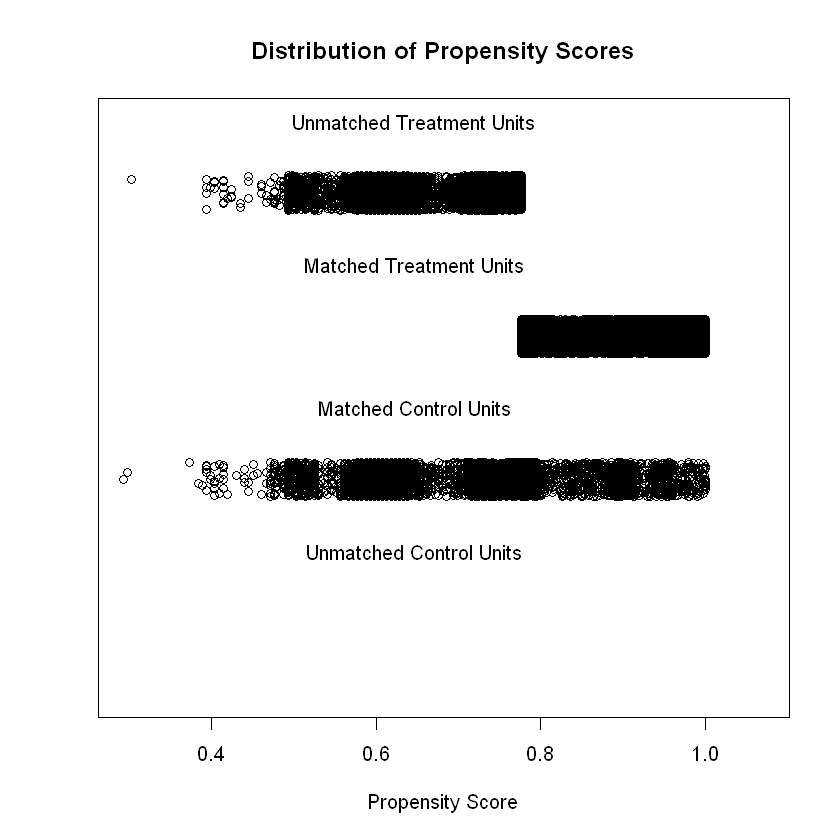

In [47]:
plot(mod_match, type = "jitter")

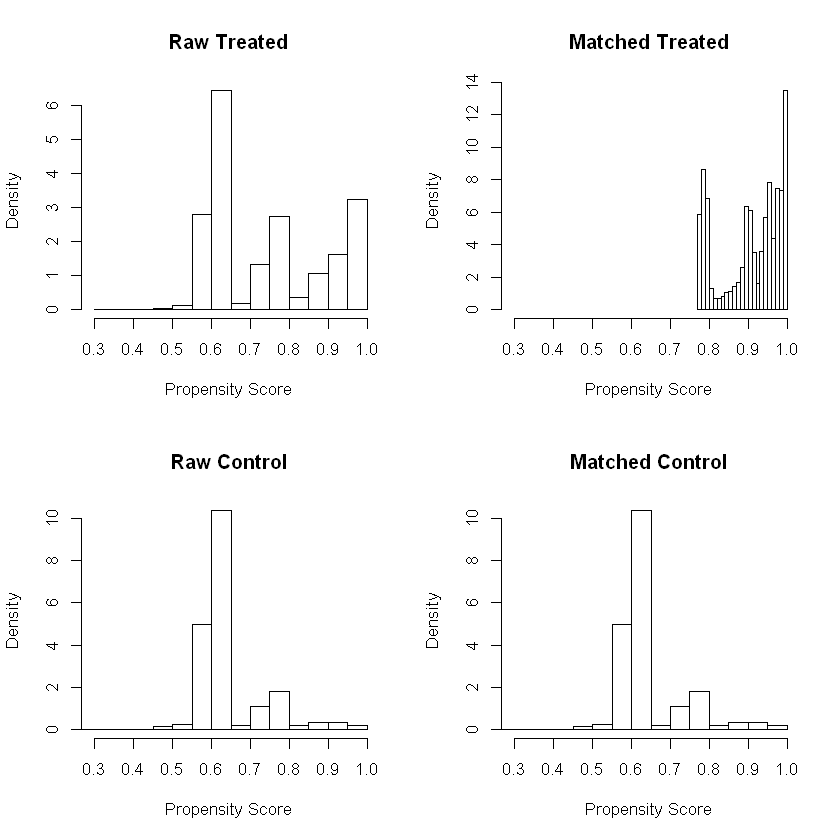

In [48]:
plot(mod_match, type = "hist")

In [49]:
head(matched)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,distance,weights
500,1,less than 20,1,2,2,1,7,0.2,1,1,0.9999416,1
500,1,less than 20,0,1,3,1,2,0.1,1,1,0.9948539,1
500,1,less than 20,1,2,6,0,0,0.0,0,1,0.9853287,1
500,1,less than 20,1,1,4,1,1,-0.3,2,1,0.9981121,1
500,1,less than 20,1,2,6,1,0,-0.4,1,1,0.9975909,1
500,1,less than 20,1,1,8,1,0,-0.7,3,1,0.9995230,1


In [50]:
# Doing T - test on matched records
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from matched (pos = 4):

    distance, PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK, weights

The following objects are masked from matched (pos = 5):

    distance, PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,

In [51]:
gender_female  <-subset(matched,SEX_CODE_CD == 0)
gender_male<-subset(matched,SEX_CODE_CD == 1)


In [52]:
t.test(SSL_SCORE~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = -79.143, df = 27020, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.44033 -20.40402
sample estimates:
mean in group 0 mean in group 1 
       342.2108        363.1329 


In [53]:
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = 77.669, df = 38018, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 18959.29 19940.96
sample estimates:
mean in group 0 mean in group 1 
       48542.64        29092.52 
